In [1]:
import torch
import time
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%config InlineBackend.figure_format = 'retina'

plt.rc('font', size=14)

## Load Cov, mask

In [2]:
data_dir = '/home/hhg/Research/emu_Nx2pt/data/'
filename = data_dir+'cov3500.pkl'

with open(filename, 'rb') as handle:
    cov_full = pickle.load(handle)

In [3]:
#dir_dataV = '/home/hhg/Research/emu_Nx2pt/data/train_300_raw/'
#file_mask = '/home/hhg/Research/emu_Nx2pt/data/train_300_raw/10x2pt_emu_0_mask.txt'
dir_dataV = '/home/hhg/Research/emu_Nx2pt/data/train_1M_raw/'
file_mask = '/home/hhg/Research/emu_Nx2pt/data/train_1M_raw/10x2pt_emu_0_mask.txt'
mask_float = np.loadtxt(file_mask)[:,1]
mask = mask_float.astype(bool)
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [4]:
cov = cov_full[mask][:, mask]
cov.shape

(3132, 3132)

In [5]:
L = np.linalg.cholesky(cov)
invL = np.linalg.inv(L)

## Transform For Loop

In [60]:
def transform_dataV(i, dir_dataV, dir_out, mask, invL):
    dataV  = np.loadtxt(dir_dataV+f'10x2pt_emu_{i}')[:,1]
    dataVp = invL@dataV[mask]
    dataT = torch.from_numpy(dataVp).float()
    torch.save(dataT, dir_out+f'dataT_{i}.pt')

In [63]:
dir_out = '/home/hhg/Research/emu_Nx2pt/data/train_300/'

start = time.time()
for i in range(10):
    transform_dataV(i, dir_dataV, dir_out, mask, invL)

end = time.time()
escape = (end-start)/60.
print(f'Total Time : {escape} (mins)')

Total Time : 0.011313366889953613 (mins)


## Try 1 vector

In [6]:
i = 0
dataVi  = np.loadtxt(dir_dataV+f'10x2pt_emu_{i}')[:,1]
dataVip = invL@dataVi[mask]

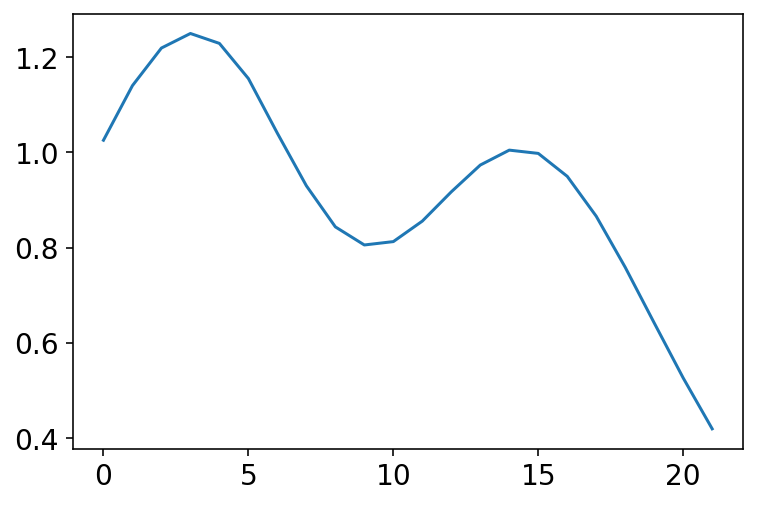

In [40]:
plt.plot(range(0,22), dataVip[0:22])

In [49]:
# Convert numpy array to PyTorch tensor
dataTi = torch.from_numpy(dataVip).float()

In [50]:
torch.save(dataTi, f'dataT_{i}.pt')

In [52]:
dataT = torch.load(f'dataT_{i}.pt')

In [53]:
dataT_i

tensor([ 1.0256,  1.1404,  1.2194,  ..., 60.0039, 62.1121, 41.5589])

In [54]:
dataT

tensor([ 1.0256,  1.1404,  1.2194,  ..., 60.0039, 62.1121, 41.5589])